# System Recommendation - MovieLens (Native Matrix Factorization)

### Import Library

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
%matplotlib inline

### 1. Preprocessing

In [2]:
user_df = pd.read_csv('../../data/movielens/u.user', sep='|', header=None, names=['Index', 'Age', 'Gender', 'Occupation', 'Zip code'])

In [3]:
user_df.head()

,Index,Age,Gender,Occupation,Zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Shape of Data

In [4]:
user_df.shape

(943, 5)

#### Average User Age

In [5]:
user_df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,943.0,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0


#### Comparison User Gender

<AxesSubplot:>

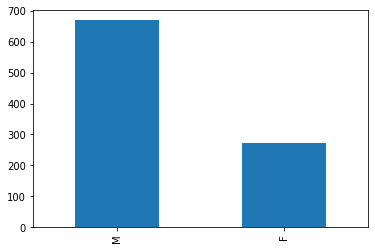

In [6]:
user_df['Gender'].value_counts().plot(kind='bar')

#### Comparison User Occupation

<AxesSubplot:>

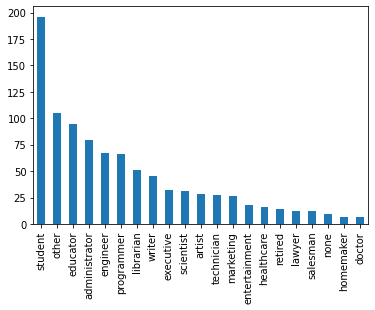

In [7]:
user_df['Occupation'].value_counts().plot(kind='bar')

#### Encode User Gender Into Binary

In [8]:
user_gender = np.array(user_df['Gender'])

In [9]:
total_user = len(user_gender)

In [10]:
encoded_user_gender = np.where(np.array(user_gender) == 'M', 0, 1)
print("Total number of users:", total_user)
print("\nEncoded user gender shape:", encoded_user_gender.shape)
print("\n", encoded_user_gender)

Total number of users: 943

Encoded user gender shape: (943,)

 [0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1

#### Import User Occupation

In [11]:
occupation_df = pd.read_csv('../../data/movielens/u.occupation', sep='|', header=None)

In [12]:
occupation_df

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [13]:
total_occupation = len(occupation_df)
print("Total number of occupations", total_occupation)

Total number of occupations 21


#### Encode User Occupation Into Binary

In [14]:
user_occupation_matrix = np.zeros((total_user, total_occupation))
print("Zero matrix shape for user occupation:", user_occupation_matrix.shape)

Zero matrix shape for user occupation: (943, 21)


#### Assign User Occupation Value For Each Possible Occupation

In [15]:
for i in np.arange(total_user):
    ### Get Occupation Index From List of Occupation
    occupation_index = occupation_df.loc[:, 0].tolist().index(user_df.loc[i, 'Occupation'])
    user_occupation_matrix[i][occupation_index] = 1

In [16]:
print("User occupation matrix after encoded:\n\n", user_occupation_matrix)

User occupation matrix after encoded:

 [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


#### Concatenate User Attribute

In [17]:
np.expand_dims(user_df['Age'].to_numpy(), axis=1).shape

(943, 1)

In [18]:
np.expand_dims(encoded_user_gender, axis=1).shape

(943, 1)

In [19]:
user_occupation_matrix.shape

(943, 21)

In [20]:
user_attribute = np.concatenate((np.expand_dims(user_df['Age'].to_numpy(), axis=1), np.expand_dims(encoded_user_gender, axis=1), user_occupation_matrix), axis=1)

In [21]:
print("Final user attribute shape:", user_attribute.shape)

Final user attribute shape: (943, 23)


#### Import Movie

In [22]:
genre_df = pd.read_csv('../../data/movielens/u.genre', sep='|', header=None)

In [23]:
genre_df

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [24]:
movie_df = pd.read_csv('../../data/movielens/u.item', sep='|', header=None, encoding='latin-1', names=['Index', 'Title', 'Release', 'The NaN Column', 'Imdb'] + genre_df[0].tolist())

In [25]:
movie_df

,Index,Title,Release,The NaN Column,Imdb,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
total_movie = len(movie_df)

#### Total Movies Per Genre

<AxesSubplot:>

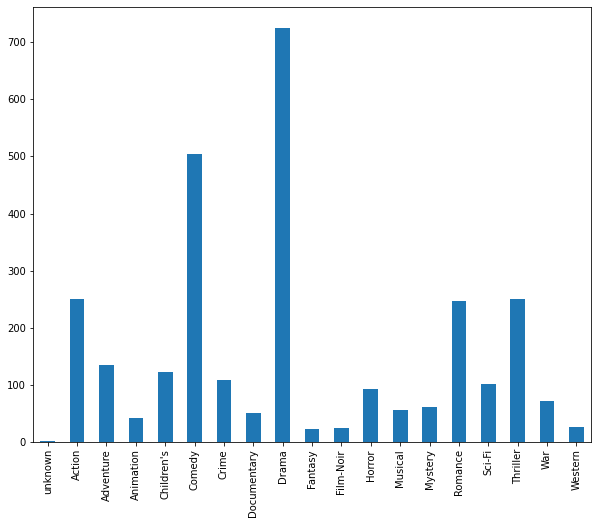

In [27]:
movie_df.loc[:, 'unknown':].sum().plot(kind='bar', figsize=(10, 8))

#### Import Training & Test Set

Training and test set consist of user id, movie id, rating, and time attribute.\
Training set consist of 80K data.\
Test set consist of 20K data.

In [28]:
training_df = pd.read_csv('../../data/movielens/u1.base', sep='\t', header=None, names=['User Id', 'Movie Id', 'Rating', 'Timestamp'])

In [29]:
training_df

,User Id,Movie Id,Rating,Timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [30]:
test_df = pd.read_csv('../../data/movielens/u1.test', sep='\t', header=None, names=['User Id', 'Movie Id', 'Rating', 'Timestamp'])

In [31]:
test_df

,User Id,Movie Id,Rating,Timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198
...,...,...,...,...
19995,458,648,4,886395899
19996,458,1101,4,886397931
19997,459,934,3,879563639
19998,460,10,3,882912371


#### Create Matrix User x Movies

Create matrix with size user (as row) x size movie (as column).\
Each cell consist of user rating value for that particular movie.\
\
Example:  

|        | Movie-1 | Movie-2 |
| ------ | ------- | ------- |
| User-1 | 4       | 3       |
| User-2 | 5       | 2.5     |  
  
And so on...


In [32]:
def create_matrix_user_movie_rating(data, nb_users, nb_movies):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:,1][data[:,0] == id_users]
        id_ratings = data[:,2][data[:,0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return np.array(new_data)

#### Convert Training Set

In [33]:
train_set = create_matrix_user_movie_rating(np.array(training_df), total_user, total_movie)

In [34]:
train_set.shape

(943, 1682)

In [35]:
pd.DataFrame(train_set)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert Test Set

In [36]:
test_set = create_matrix_user_movie_rating(np.array(test_df), total_user, total_movie)

In [37]:
test_set.shape

(943, 1682)

In [38]:
pd.DataFrame(test_set)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Visualize Histogram Number of Movies Watched per User

##### Training set

In [39]:
num_watched_movies_train = np.where(train_set > 0, 1, 0)

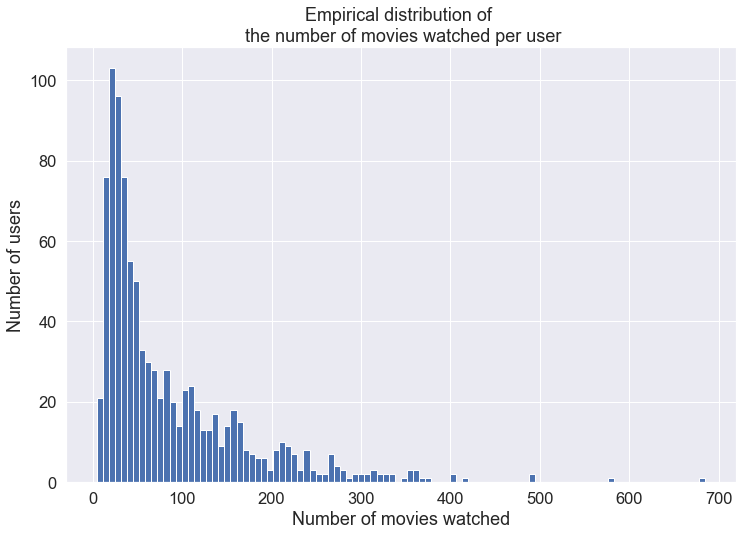

In [40]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.title('Empirical distribution of \n the number of movies watched per user')
plt.xlabel('Number of movies watched')
plt.ylabel('Number of users')
plt.hist(np.sum(num_watched_movies_train, axis=1), 100);

#### Split Training Set Into Train and Validation Set

In [41]:
def split(data, ratio, tensor=False):
    train = np.zeros(data.shape)
    valid = np.zeros(data.shape)

    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] > 0:
                if np.random.binomial(1, ratio, 1):
                    train[i][j] = data[i][j]
                else:
                    valid[i][j] = data[i][j]

    return [train, valid]

In [42]:
train, validation = split(train_set, 0.8)
test = test_set

In [43]:
print("Total training set:", train.shape)
print("Total validation set:", validation.shape)
print("Total test set:", test.shape)

Total training set: (943, 1682)
Total validation set: (943, 1682)
Total test set: (943, 1682)


In [44]:
pd.DataFrame(train)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
pd.DataFrame(validation)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
pd.DataFrame(test)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Implement MF Model

In [47]:
def learn_to_recommend(data, features=10, lr=0.0002, epochs=101, weigth_decay=0.02, stopping=0.001):
    """
    Args:
       data: every evaluation
       features: number of latent variables
       lr: learning rate for gradient descent
       epochs: number of iterations or maximum loops to perform
       weigth_decay: L2 regularization to predict rattings different of 0
       stopping: scalar associated with the stopping criterion
      
     Returns:
       P: latent matrix of users
       Q: latent matrix of items
       loss_train: vector of the different values of the loss function after each iteration on the train
       loss_valid: vector of the different values of the loss function after each iteration not on valid
       """
     
    train, valid = data[0], data[1]
    nb_users, nb_items = len(train), len(train[0])

    # Initialization of lists
    loss_train, loss_valid = [], []

    P = np.random.rand(nb_users, features) * 0.1
    Q = np.random.rand(nb_items, features) * 0.1
    
    for e in range(epochs):        
        for u in range(nb_users):
            for i in range(nb_items):

                # Code the condition
                if train[u][i] > 0:
                    error_ui = train[u][i] - prediction(P, Q, u, i)
                    P, Q = sgd(error_ui, P, Q, u, i, features, lr, weigth_decay)
                               
        # Code the statistics
        loss_train.append(loss(train, P, Q))
        loss_valid.append(loss(valid, P, Q))
        
        print('Epoch : ', "{:3.0f}".format(e+1), ' | Train :', "{:3.3f}".format(loss_train[-1]), 
                  ' | Valid :', "{:3.3f}".format(loss_valid[-1]))

        # Stopping criterion
        if e > 1:
            if abs(loss_valid[-1] - loss_valid[-2]) < stopping:
                print(f"Validation loss no more gain improvement (less than {stopping})")
                break
        
    return P, Q, loss_train, loss_valid

In [48]:
def prediction(P, Q, u, i):
    """
    Args:
        P: user matrix
        Q: matrix of items
        u: index associated with user u
        i: index associated with item i
    Returns:
        pred: the predicted evaluation of the user u for the item i
    """
    
    return np.dot(P[u,:], Q[i,:])

def loss(data, P, Q):
    """
    Args:
       data: ratings
       P: matrix of users
       Q: matrix of items   
    Returns:
        MSE: observed mean of squared errors 
    """
    errors_sum, nb_evaluations = 0., 0
    nb_users, nb_items = len(data), len(data[0])

    for u in range(nb_users):
        for i in range(nb_items):
        
            if data[u][i] > 0:
                errors_sum += pow(data[u][i] - prediction(P, Q, u, i), 2)
                nb_evaluations += 1
                
    return errors_sum / nb_evaluations

In [49]:
def sgd(error, P, Q, id_user, id_item, features, lr, weigth_decay):
    """
    Args:
        error: difference between observed and predicted evaluation (in that order)
        P: matrix of users
        Q: matrix of items
        id_user: id_user
        id_item: id_item
        features: number of latent variables
        lr: learning for the descent of the gradient
        weigth_decay: scalar multiplier controlling the influence of the regularization term
       
     Returns:
        P: the new estimate for P
        Q: the new estimate for Q
     """    
    
    for f in range(features):
        P[id_user, f] = P[id_user, f] + lr * (2 * Q[id_item, f] * error - 2 * weigth_decay * P[id_user, f])
        Q[id_item, f] = Q[id_item, f] + lr * (2 * P[id_user, f] * error - 2 * weigth_decay * Q[id_item, f])
      
    return P, Q

In [50]:
features = 5
lr = 0.01
epochs = 101
weigth_decay = 0.02
stopping = 0.001

P, Q, loss_train, loss_valid = learn_to_recommend((train, validation), features, lr, epochs, weigth_decay, stopping)

Epoch :    1  | Train : 6.907  | Valid : 6.928
Epoch :    2  | Train : 1.230  | Valid : 1.333
Epoch :    3  | Train : 1.020  | Valid : 1.113
Epoch :    4  | Train : 0.974  | Valid : 1.065
Epoch :    5  | Train : 0.948  | Valid : 1.040
Epoch :    6  | Train : 0.929  | Valid : 1.024
Epoch :    7  | Train : 0.909  | Valid : 1.011
Epoch :    8  | Train : 0.885  | Valid : 0.999
Epoch :    9  | Train : 0.857  | Valid : 0.990
Epoch :   10  | Train : 0.830  | Valid : 0.984
Epoch :   11  | Train : 0.805  | Valid : 0.981
Epoch :   12  | Train : 0.783  | Valid : 0.981
Validation loss no more gain improvement (less than 0.001)


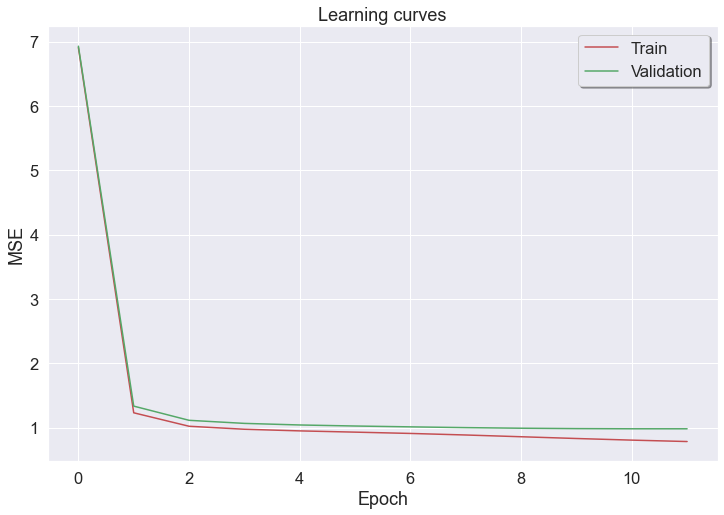

In [51]:
x = list(range(len(loss_train)))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], loss_train[-k:], 'r', label="Train")
plt.plot(x[-k:], loss_valid[-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

In [52]:
loss(test, P, Q)

0.9988012010121716

### 3. Ranking Movies Using Model

In [53]:
def rank_top_k(names, ratings, k=10):
   """
   Example:
   a, b = np.array(['a', 'b', 'c']), np.array([6, 1, 3])
   a, b = rank_top_k(a, b, k=2)
   >>> a
   np.array('a', 'c')
   >>> b
   np.array([6, 3])
   """
 
   # rank indices in descending order
   ranked_ids = np.argsort(ratings)[::-1]
 
   return names[ranked_ids][:k], ratings[ranked_ids][:k]

#### Define User & Total Movie To Select

In [54]:
user_id = 0
number_top_movie = 10

#### Get User Preferences

In [55]:
user_train = np.array(train[user_id])

In [56]:
user_train

array([5., 3., 4., ..., 0., 0., 0.])

#### Select Movie That Hasn't Seen By The User

In [57]:
movies_not_seen = np.where(user_train == 0, 1, 0)

In [58]:
movies_not_seen

array([0, 0, 0, ..., 1, 1, 1])

#### Get User's Rating Prediction For Each Movie

In [59]:
estimates = np.dot(P[user_id, :], Q.T)

In [60]:
estimates

array([3.72799069, 3.21752305, 3.45739356, ..., 0.18914024, 1.67565815,
       1.81132015])

##### Note: If the user has seen that movie, change the prediction rating to zero

In [61]:
unseen_movie_estimates = estimates * movies_not_seen

In [62]:
unseen_movie_estimates

array([0.        , 0.        , 0.        , ..., 0.18914024, 1.67565815,
       1.81132015])

#### Get Top Recommendation and Predicted Rating

In [63]:
recommendations, scores = rank_top_k(np.array(movie_df['Title']), unseen_movie_estimates, k=number_top_movie)

In [64]:
pd.DataFrame(np.matrix((recommendations, scores)).T, (np.arange(10) + 1).tolist(), 
                  columns=['Title', 'Predicted rating'])

,Title,Predicted rating
1,Pulp Fiction (1994),5.491974
2,Pather Panchali (1955),5.217842
3,"Close Shave, A (1995)",5.096713
4,Sense and Sensibility (1995),5.065789
5,Schindler's List (1993),5.058397
6,One Flew Over the Cuckoo's Nest (1975),4.964915
7,Dr. Strangelove or: How I Learned to Stop Worr...,4.892871
8,L.A. Confidential (1997),4.890093
9,"Wild Bunch, The (1969)",4.864634
10,"Birds, The (1963)",4.862097


#### Get Top Recommendation Based By Genre

In [65]:
def recommend(user_id, data, P, Q, list_of_genre_names, movies_genre, genre):
    """
    args:
       user_id: user_id
        data: user-item ratings
        P: user matrix
        Q: item matrix
       list_of_genre_names: list of genre names
        movies_genre: user's preference for genres
        new: Boolean, do we want to make new recommendations or not?

    Returns:
        the best suggestions based on the genre of movie selected
    """

    # Answer 11.1
    place = movies_genre_name.tolist().index(genre)   
    genre = np.array(movies_genre[:, place])
    predictions = np.array(np.dot(P[user_id, :], Q.T))
    
    return np.array(predictions) * np.array(genre.T)[0]

In [66]:
genre = "Animation"
user_id = 1
top_k = 10

In [67]:
movies_genre_name = genre_df[0]
movies_genre = np.matrix(movie_df.loc[:, 'unknown':])

In [68]:
estimates = recommend(user_id, train, P, Q, list_of_genre_names=movies_genre_name, movies_genre=movies_genre, genre=genre)

In [69]:
recommendations, scores = rank_top_k(np.array(movie_df['Title']), estimates, k=top_k)

In [70]:
pd.DataFrame(np.matrix((recommendations, scores)).T, (np.arange(top_k) + 1).tolist(), columns = ['Title', 'Predicted rating'])

,Title,Predicted rating
1,"Close Shave, A (1995)",4.654761
2,"Wrong Trousers, The (1993)",4.485877
3,Wallace & Gromit: The Best of Aardman Animatio...,4.303824
4,"Grand Day Out, A (1992)",4.154669
5,Faust (1994),4.10139
6,Ghost in the Shell (Kokaku kidotai) (1995),4.049679
7,Winnie the Pooh and the Blustery Day (1968),4.013475
8,Fantasia (1940),3.789944
9,Aladdin (1992),3.657407
10,Hercules (1997),3.612094
